In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/subset.csv')

In [3]:
def get_test_train_split(df):
    # Split features and target
    X = df.drop('Price', axis=1)
    y = df['Price']
    
    # Split into train and test sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [4]:
def get_performance_metrics(y_test, y_pred, print_metrics=True):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Return dictionary of metrics
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

    if print_metrics:
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")
        print(f"R2: {r2:.4f}")
    
    return metrics

# Baseline Model

In [5]:
from sklearn.linear_model import LinearRegression


baseline_X_train, baseline_X_test, baseline_y_train, baseline_y_test = get_test_train_split(df)

baseline_model = LinearRegression()
baseline_model.fit(baseline_X_train, baseline_y_train)
y_pred = baseline_model.predict(baseline_X_test)
baseline_metrics = get_performance_metrics(baseline_y_test, y_pred)

MSE: 0.0000
RMSE: 0.0041
MAE: 0.0012
R2: 0.9995


# More models

In [6]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Dictionary to store all models
models = {
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'MLP': MLPRegressor(random_state=42, max_iter=500)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(baseline_X_train, baseline_y_train)
    y_pred = model.predict(baseline_X_test)
    results[name] = get_performance_metrics(baseline_y_test, y_pred, print_metrics=True)

# Compare R2 scores
r2_scores = {name: metrics['R2'] for name, metrics in results.items()}
r2_scores['Baseline Linear'] = baseline_metrics['R2']


Training Ridge...
MSE: 0.0000
RMSE: 0.0041
MAE: 0.0014
R2: 0.9995

Training Decision Tree...
MSE: 0.0017
RMSE: 0.0410
MAE: 0.0321
R2: 0.9525

Training Random Forest...
MSE: 0.0006
RMSE: 0.0241
MAE: 0.0195
R2: 0.9836

Training Gradient Boosting...
MSE: 0.0002
RMSE: 0.0134
MAE: 0.0105
R2: 0.9949

Training SVR...
MSE: 0.0010
RMSE: 0.0322
MAE: 0.0244
R2: 0.9706

Training KNN...
MSE: 0.0004
RMSE: 0.0201
MAE: 0.0159
R2: 0.9885

Training MLP...
MSE: 0.0001
RMSE: 0.0102
MAE: 0.0077
R2: 0.9971


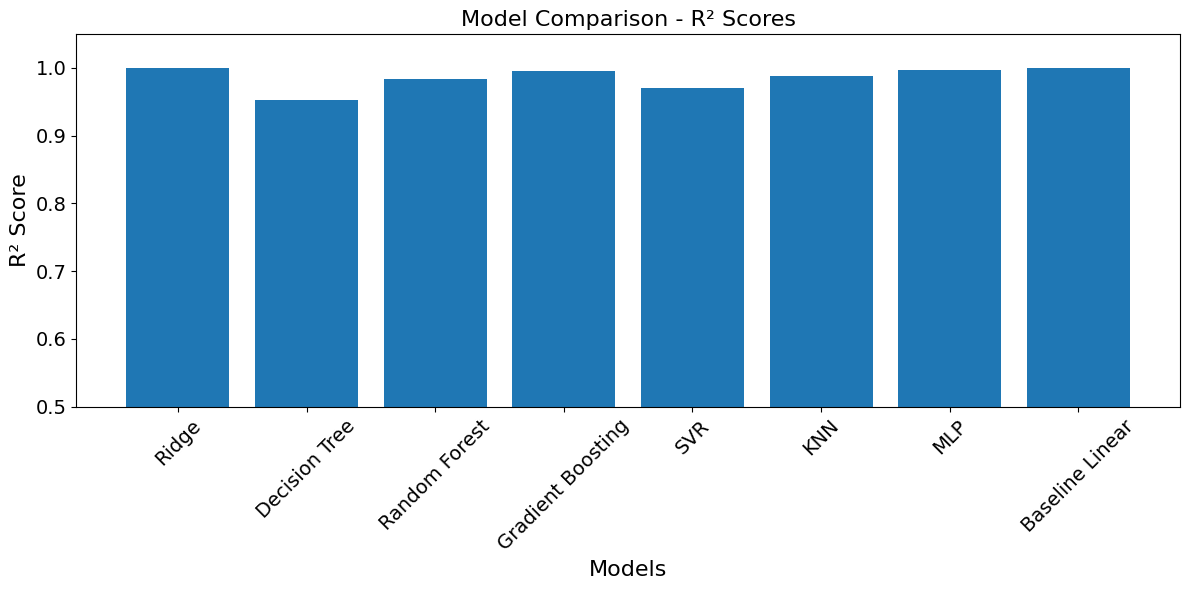

In [7]:
# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(r2_scores.keys(), r2_scores.values())
plt.ylim(bottom=0.5)  # Set y-axis to start at 0.5
plt.xticks(rotation=45, fontsize=14)  # Increased font size for x-tick labels
plt.title('Model Comparison - R² Scores', fontsize=16)  # Increased font size for title
plt.ylabel('R² Score', fontsize=16)  # Increased font size for y-label
plt.xlabel('Models', fontsize=16)  # Added x-label with larger font
plt.tick_params(axis='y', labelsize=14)  # Increased font size for y-tick labels
plt.tight_layout()
plt.show()

Ridge, Random Forest, Gradient Boosting and MLP look promsing and therefore will be evaluated in more detail.

# Ridge




In [8]:
# Define parameter grid for Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Initialize GridSearchCV
ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for Ridge...")
ridge_grid.fit(baseline_X_train, baseline_y_train)

# Print best parameters and score
print("\nBest parameters:", ridge_grid.best_params_)
print("Best R² score:", ridge_grid.best_score_)

# Evaluate best model on test set
best_ridge = ridge_grid.best_estimator_
y_pred = best_ridge.predict(baseline_X_test)
print("\nTest set performance:")
ridge_best_metrics = get_performance_metrics(baseline_y_test, y_pred, print_metrics=True)


Performing grid search for Ridge...

Best parameters: {'alpha': 0.01, 'solver': 'sparse_cg'}
Best R² score: 0.9991110479498639

Test set performance:
MSE: 0.0000
RMSE: 0.0041
MAE: 0.0012
R2: 0.9995


# Random Forest

In [9]:
# Define parameter grid for Random Forest
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Initialize GridSearchCV
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for Random Forest...")
rf_grid.fit(baseline_X_train, baseline_y_train)

# Print best parameters and score
print("\nBest parameters:", rf_grid.best_params_)
print("Best R² score:", rf_grid.best_score_)

# Evaluate best model on test set
best_rf = rf_grid.best_estimator_
y_pred = best_rf.predict(baseline_X_test)
print("\nTest set performance:")
rf_best_metrics = get_performance_metrics(baseline_y_test, y_pred, print_metrics=True)


Performing grid search for Random Forest...

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² score: 0.9828241774973019

Test set performance:
MSE: 0.0006
RMSE: 0.0239
MAE: 0.0194
R2: 0.9839


# Gradient Boosting

In [10]:
# Define parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for Gradient Boosting...")
gb_grid.fit(baseline_X_train, baseline_y_train)

# Print best parameters and score
print("\nBest parameters:", gb_grid.best_params_)
print("Best R² score:", gb_grid.best_score_)

# Evaluate best model on test set
best_gb = gb_grid.best_estimator_
y_pred = best_gb.predict(baseline_X_test)
print("\nTest set performance:")
gb_best_metrics = get_performance_metrics(baseline_y_test, y_pred, print_metrics=True)


Performing grid search for Gradient Boosting...

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² score: 0.997253784887417

Test set performance:
MSE: 0.0001
RMSE: 0.0094
MAE: 0.0073
R2: 0.9975


# MLP

In [11]:
# Define parameter grid for MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500],  # Increased max_iter to ensure convergence
    'alpha': [0.0001, 0.001, 0.01]  # L2 regularization parameter
}

# Initialize GridSearchCV
mlp_grid = GridSearchCV(
    MLPRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit the grid search
print("Performing grid search for MLP...")
mlp_grid.fit(baseline_X_train, baseline_y_train)

# Print best parameters and score
print("\nBest parameters:", mlp_grid.best_params_)
print("Best R² score:", mlp_grid.best_score_)

# Evaluate best model on test set
best_mlp = mlp_grid.best_estimator_
y_pred = best_mlp.predict(baseline_X_test)
print("\nTest set performance:")
mlp_best_metrics = get_performance_metrics(baseline_y_test, y_pred, print_metrics=True)


Performing grid search for MLP...

Best parameters: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1, 'max_iter': 500}
Best R² score: 0.9999815598223483

Test set performance:
MSE: 0.0000
RMSE: 0.0003
MAE: 0.0002
R2: 1.0000


# Cross Validation


In [12]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for all four models
print("Cross-validation results for Random Forest:")
rf_cv_scores = cross_val_score(best_rf, baseline_X_train, baseline_y_train, cv=5)
print("CV scores:", rf_cv_scores)
print("Mean CV score: {:.4f} (+/- {:.4f})".format(rf_cv_scores.mean(), rf_cv_scores.std() * 2))
print("Training score:", best_rf.score(baseline_X_train, baseline_y_train))
print("\n")

print("Cross-validation results for Gradient Boosting:")
gb_cv_scores = cross_val_score(best_gb, baseline_X_train, baseline_y_train, cv=5)
print("CV scores:", gb_cv_scores)
print("Mean CV score: {:.4f} (+/- {:.4f})".format(gb_cv_scores.mean(), gb_cv_scores.std() * 2))
print("Training score:", best_gb.score(baseline_X_train, baseline_y_train))
print("\n")

print("Cross-validation results for MLP:")
mlp_cv_scores = cross_val_score(best_mlp, baseline_X_train, baseline_y_train, cv=5)
print("CV scores:", mlp_cv_scores)
print("Mean CV score: {:.4f} (+/- {:.4f})".format(mlp_cv_scores.mean(), mlp_cv_scores.std() * 2))
print("Training score:", best_mlp.score(baseline_X_train, baseline_y_train))
print("\n")

print("Cross-validation results for Ridge:")
ridge_cv_scores = cross_val_score(best_ridge, baseline_X_train, baseline_y_train, cv=5)
print("CV scores:", ridge_cv_scores)
print("Mean CV score: {:.4f} (+/- {:.4f})".format(ridge_cv_scores.mean(), ridge_cv_scores.std() * 2))
print("Training score:", best_ridge.score(baseline_X_train, baseline_y_train))

Cross-validation results for Random Forest:
CV scores: [0.98187011 0.98211747 0.98305268 0.98308162 0.98399901]
Mean CV score: 0.9828 (+/- 0.0015)
Training score: 0.9978429990428089


Cross-validation results for Gradient Boosting:
CV scores: [0.99699726 0.99701685 0.99708887 0.99756487 0.99760108]
Mean CV score: 0.9973 (+/- 0.0005)
Training score: 0.998088969734988


Cross-validation results for MLP:
CV scores: [0.99995408 0.99998356 0.9999882  0.99998736 0.99999459]
Mean CV score: 1.0000 (+/- 0.0000)
Training score: 0.9999927362721429


Cross-validation results for Ridge:
CV scores: [0.99923543 0.99870749 0.99876226 0.99924883 0.99960123]
Mean CV score: 0.9991 (+/- 0.0007)
Training score: 0.9991243964402471


This is a good sign, the cross validation scores are high and the training score is also high. This means that the model is not overfitting. But it can show that the training data is really good or artificial.

# Regularization

In [13]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': baseline_X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
                       feature  importance
1                          Age    0.443396
0                      Mileage    0.315355
2                  Engine_Size    0.139232
3           Fuel_Type_Electric    0.048177
4       Transmission_Automatic    0.046224
6             Fuel_Type_Diesel    0.003209
5             Fuel_Type_Petrol    0.003178
8          Transmission_Manual    0.000632
7  Transmission_Semi-Automatic    0.000596


In [14]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': baseline_X_train.columns,
    'importance': best_gb.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
                       feature    importance
1                          Age  4.413524e-01
0                      Mileage  3.064366e-01
2                  Engine_Size  1.315872e-01
4       Transmission_Automatic  5.313090e-02
3           Fuel_Type_Electric  4.527467e-02
5             Fuel_Type_Petrol  1.227710e-02
6             Fuel_Type_Diesel  9.934695e-03
7  Transmission_Semi-Automatic  5.980669e-06
8          Transmission_Manual  4.623341e-07


In [15]:
# Feature importance analysis for MLP using absolute values
feature_importance = pd.DataFrame({
    'feature': baseline_X_train.columns,
    'importance': np.abs(best_mlp.coefs_[0]).mean(axis=1)  # Take mean of absolute weights
})
feature_importance = feature_importance.sort_values('importance', ascending=False)  # Changed to descending order

print("\nTop 10 most important features:")
print(feature_importance.head(10))



Top 10 most important features:
                       feature  importance
2                  Engine_Size    0.265077
0                      Mileage    0.264614
1                          Age    0.262699
8          Transmission_Manual    0.224910
6             Fuel_Type_Diesel    0.211027
5             Fuel_Type_Petrol    0.210822
7  Transmission_Semi-Automatic    0.194686
3           Fuel_Type_Electric    0.193695
4       Transmission_Automatic    0.175278


In [16]:
# Feature importance analysis for Ridge using absolute coefficients
feature_importance = pd.DataFrame({
    'feature': baseline_X_train.columns,
    'importance': np.abs(best_ridge.coef_)  # Take absolute values of coefficients
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 most important features:")
print(feature_importance.head(10))
          


Top 10 most important features:
                       feature  importance
1                          Age    0.421113
0                      Mileage    0.365746
2                  Engine_Size    0.243452
3           Fuel_Type_Electric    0.061199
4       Transmission_Automatic    0.060976
5             Fuel_Type_Petrol    0.060662
6             Fuel_Type_Diesel    0.060615
7  Transmission_Semi-Automatic    0.030561
8          Transmission_Manual    0.030414


# Is my model overfitting?

## Learning Curves

Generating learning curves...


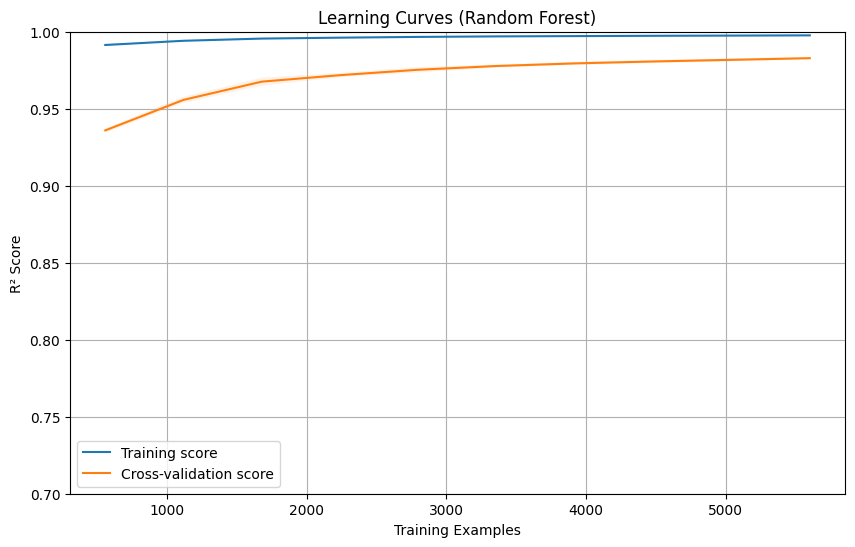

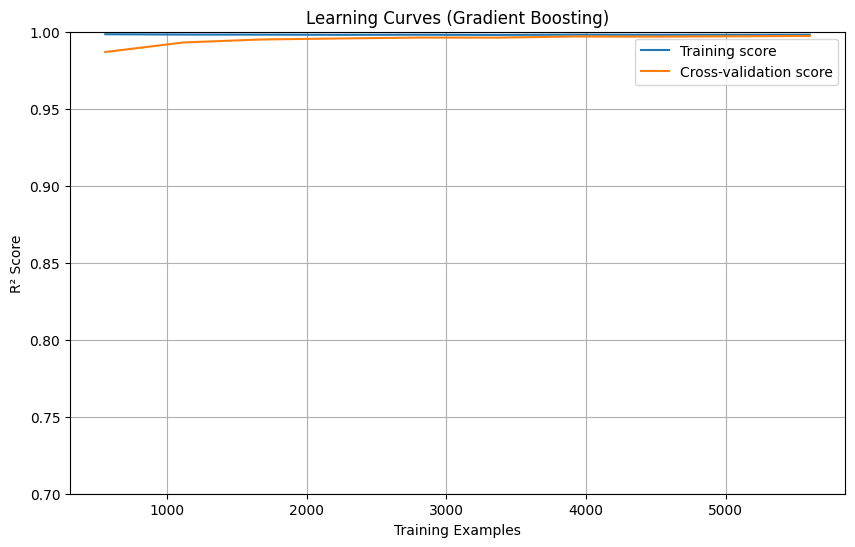

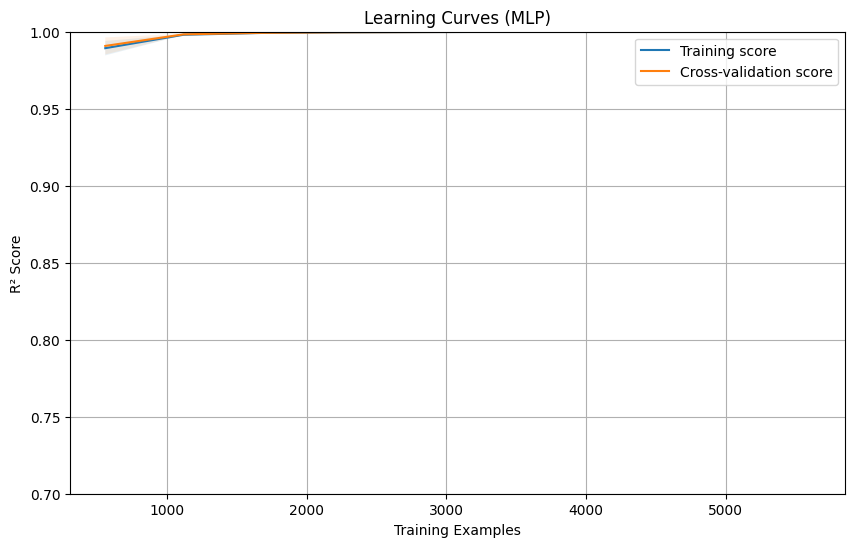

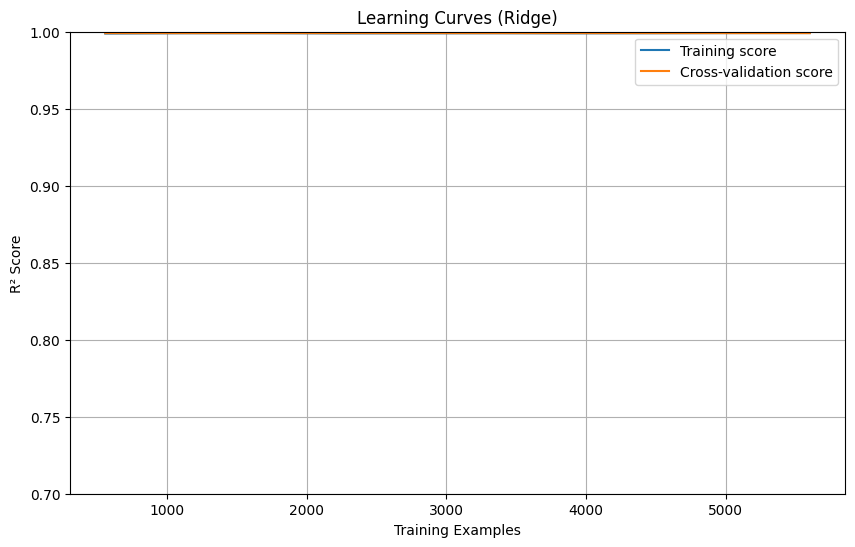

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curves(estimator, X, y, model_name):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='r2'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, val_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
    plt.xlabel('Training Examples')
    plt.ylabel('R² Score')
    plt.title(f'Learning Curves ({model_name})')
    plt.legend(loc='best')
    plt.grid(True)
    plt.ylim(0.7, 1.00)  # Set y-axis limits from 0.95 to 1.00
    plt.show()

# Plot learning curves for each model
print("Generating learning curves...")
plot_learning_curves(best_rf, baseline_X_train, baseline_y_train, "Random Forest")
plot_learning_curves(best_gb, baseline_X_train, baseline_y_train, "Gradient Boosting")
plot_learning_curves(best_mlp, baseline_X_train, baseline_y_train, "MLP")
plot_learning_curves(best_ridge, baseline_X_train, baseline_y_train, "Ridge")

- If the training score is much higher than the validation score, it indicates overfitting
- If both curves are close together and plateau, it suggests good fitting
- If both curves are still rising, you might benefit from more data

## Compare training vs cross-validation

In [18]:
# 2. Compare training vs cross-validation scores
models = {
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'MLP': best_mlp,
    'Ridge': best_ridge
}

print("\nTraining vs Cross-validation Scores:")
print("-" * 50)
for name, model in models.items():
    train_score = model.score(baseline_X_train, baseline_y_train)
    cv_scores = cross_val_score(model, baseline_X_train, baseline_y_train, cv=5)
    cv_mean = cv_scores.mean()
    score_diff = train_score - cv_mean
    
    print(f"\n{name}:")
    print(f"Training Score: {train_score:.4f}")
    print(f"CV Score (mean): {cv_mean:.4f}")
    print(f"Difference: {score_diff:.4f}")
    
    # Rule of thumb interpretation
    if score_diff > 0.1:
        print("WARNING: Possible overfitting (difference > 0.1)")
    elif score_diff < 0.01:
        print("Good fit (difference < 0.01)")
    else:
        print("Moderate fit (0.01 <= difference <= 0.1)")


Training vs Cross-validation Scores:
--------------------------------------------------

Random Forest:
Training Score: 0.9978
CV Score (mean): 0.9828
Difference: 0.0150
Moderate fit (0.01 <= difference <= 0.1)

Gradient Boosting:
Training Score: 0.9981
CV Score (mean): 0.9973
Difference: 0.0008
Good fit (difference < 0.01)

MLP:
Training Score: 1.0000
CV Score (mean): 1.0000
Difference: 0.0000
Good fit (difference < 0.01)

Ridge:
Training Score: 0.9991
CV Score (mean): 0.9991
Difference: 0.0000
Good fit (difference < 0.01)
